In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
functus = []
dominus = []
for i in range(-20, 20):
    # y = 1 / (i**2 + 1)
    # y = i ** 2
    y = -0.48*i**4 + 5.52*i**3 - 22.5*i**2 + 32.34*i + 0.02
    functus.append(y)
    dominus.append(i)

In [38]:
class MMQModel:
    def __init__(self, dominus: list, functus: list):
        self.dominus = dominus
        self.functus = functus
        self.degree = None
        self.R = None

    def build_polynomial(self, degree: int):
        self.degree = degree

        max_exp = degree * 2
        m_size = degree + 1

        M = np.zeros((m_size, m_size))
        z = np.zeros((m_size, 1))

        i = 0    
        while i < m_size:
            j = 0
            while j < m_size:
                M[i][j] = sum([x**(max_exp - i - j) for x in dominus])
                j += 1
            i += 1
        
        i = 0
        while i < m_size:
            z[i][0] = sum([x**(max_exp / 2 - i) * y for x, y in zip(dominus, functus)])
            i += 1
        
        R = np.dot(np.linalg.inv(M), z)
        self.R = R
        
        return "OK"
    
    def __mmq_func(self, x: float) -> float:
        len_R = len(self.R)
        max_exp = len_R - 1
        return sum([self.R[i][0] * x**(max_exp - i) for i in range(len_R)])
        
    def run(self, x: float):
        return self.__mmq_func(x)
            


In [39]:
mmq_model = MMQModel(dominus=dominus, functus=functus)

In [50]:
mmq_model.build_polynomial(1)
theorical = [mmq_model.run(x) for x in dominus]

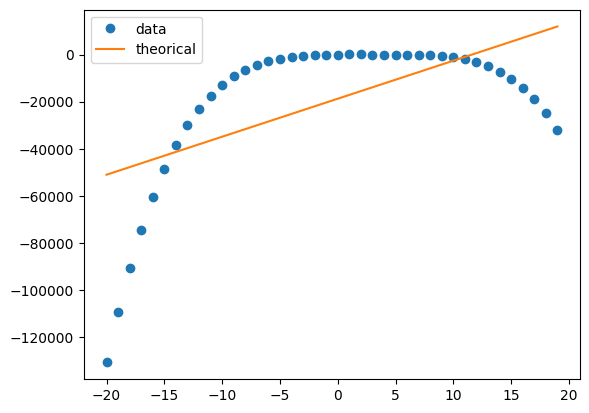

In [51]:
plt.plot(dominus, functus, 'o', label='data')
plt.plot(dominus, theorical, label='theorical')
plt.legend()
plt.show()